# Homework 6

## Mark Borjas (mab7886)

## Logistic Regression without using any libraries. 

In [132]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [133]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use logistic regerssion to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement logistic regression model without using any libs than imported above. 

* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 



In [134]:
n_feature = 3 # the number of features
n_components = 3 # the number of clusters

n = 303 # the number of total samples

In [135]:
age = heart_df["Age"]
sex = heart_df["Sex"]
chol = heart_df["Chol"]
y = heart_df["Target"]
#print(len(age),len(sex),(len(chol)))

X = np.array([age,sex,chol]).T


In [136]:
print(np.average(age))
print(np.std(age))
error1 =np.random.normal(np.average(age), np.std(age), 303)
print(error1)
print(np.average(sex))
print(np.std(sex))
print(np.average(chol))
print(np.std(chol))

54.43894389438944
9.023734831198377
[60.43557771 43.66369731 36.84487885 49.6359173  58.69452864 62.3949242
 60.58696324 51.9672993  45.808519   67.96408253 49.51097821 58.74324613
 60.26698146 56.5113462  42.6051069  63.1992984  50.8647443  73.71149934
 44.83942754 72.56611443 50.33093567 39.33485131 60.47528746 57.08177999
 50.40107406 37.08520469 61.08164441 68.42195553 71.32536097 40.79251806
 53.88279528 39.14652206 57.92712556 54.718054   39.7539379  59.91662387
 43.97552939 42.20766458 61.1307099  69.15162875 65.54544984 50.01193613
 67.04054056 51.32943647 47.48443015 58.07775995 56.7135157  64.08937513
 36.62468899 57.68602512 35.88032928 58.10178144 42.56569318 60.39628385
 59.21001089 47.22128159 36.22973488 52.28621793 53.98874452 65.39007625
 62.29768234 49.03553553 35.7072075  80.22155513 44.04934794 51.44805288
 55.35350253 61.28164678 69.01584251 66.84895563 72.86918828 52.11909626
 50.8772237  38.26150885 50.8080779  40.46672782 61.76667425 58.64117239
 55.80433802 60.

In [137]:
#y.values.map(dict(yes=1, no=0))
y
for i in range(len(y)):
    if y[i] == 'Yes':
        y[i] = 1
    else:
        y[i] = 0
y

<ipython-input-137-0f0ec9e24546>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
<ipython-input-137-0f0ec9e24546>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1


0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Target, Length: 303, dtype: object

In [10]:
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

x = [ 63   1 233] , y = 0
x = [ 67   1 286] , y = 1
x = [ 67   1 229] , y = 1
x = [ 37   1 250] , y = 0
x = [ 41   0 204] , y = 0


In [11]:
train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [12]:
def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [13]:
def cost_function(X, y, weights):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension (n x d)
        n = number of training examples
        d = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x n)

    weights : 1D array of fitting parameters or weights. Dimension (1 x d)

    O/P
    -------
    cost : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    n, d = X.shape
    x_dot_weights = X.dot(weights)

    cost = 1.0 / n * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))

    return cost

In [14]:
def gradient(X, y, weights):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
    Dimension(m x n)
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    n, d = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / n )* (sigmoid(x_dot_weights) - y).T.dot(X)

    return grad

In [15]:
weights = np.zeros(n_feature)


cost = cost_function(X_train, y_train, weights)
grad = gradient(X_train, y_train, weights)

#print(cost)
#print(grad)

In [16]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001

cost_list = []


# Implementation here is removed. 

# Your task to implement the GD here. 

for i in range(0, num_iterations):
    
    # 
    # Calculate the costs 
    cost = cost_function(X_train, y_train, weights)
    
    print('iter: ' , i, "Cost is: ", cost)
    # keep the costs for our visualization later 
    
    cost_list.append(cost)
    
    # Calculate the gradients [CODE REMOVED]
    grad = gradient(X_train, y_train, weights)
    grad = grad.astype('float64')
    
    # Use the gradient to update the weights [CODE REMOVED] 
    #print(grad)
    weights -= grad * learnin_rate

iter:  0 Cost is:  0.6931471805599462
iter:  1 Cost is:  0.6911184331775376
iter:  2 Cost is:  0.6900362632202808
iter:  3 Cost is:  0.6895345748334204
iter:  4 Cost is:  0.6892692145377417
iter:  5 Cost is:  0.6891346512728146
iter:  6 Cost is:  0.6890589700543243
iter:  7 Cost is:  0.6890140977880898
iter:  8 Cost is:  0.6889837977631846
iter:  9 Cost is:  0.6889609380923366
iter:  10 Cost is:  0.6889417173798885
iter:  11 Cost is:  0.6889243662375394
iter:  12 Cost is:  0.6889079787661341
iter:  13 Cost is:  0.6888921208963703
iter:  14 Cost is:  0.6888765745596709
iter:  15 Cost is:  0.688861233527782
iter:  16 Cost is:  0.688846044708142
iter:  17 Cost is:  0.6888309817929035
iter:  18 Cost is:  0.6888160314433742
iter:  19 Cost is:  0.6888011867684373
iter:  20 Cost is:  0.6887864440332954
iter:  21 Cost is:  0.6887718010604263
iter:  22 Cost is:  0.6887572564420875
iter:  23 Cost is:  0.688742809149132
iter:  24 Cost is:  0.6887284583428362
iter:  25 Cost is:  0.6887142032788686

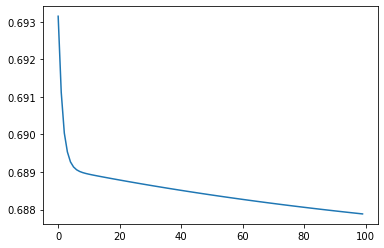

In [17]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your logistic regression implementaion. 
Print the results. 


In [18]:
def predict(weights, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(n x d)
        n= number of training examples
        d= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)



In [19]:
predictions = predict(weights, X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
y_test

242    0
243    1
244    0
245    1
246    1
      ..
298    1
299    1
300    1
301    1
302    0
Name: Target, Length: 61, dtype: object

In [21]:
# Correct Predictions are the cases that are equal. 

correct = np.sum(predictions == y_test)


print("Accuracy is: ", correct/y_test.size)

Accuracy is:  0.47540983606557374


In [22]:
def compute_tp_tn_fn_fp(y_test, predictions):
    '''
    True positive - actual = 1, predicted = 1
    False positive - actual = 1, predicted = 0
    False negative - actual = 0, predicted = 1
    True negative - actual = 0, predicted = 0
    '''
    tp = sum((y_test == 1) & (predictions == 1))
    tn = sum((y_test == 0) & (predictions == 0))
    fn = sum((y_test == 1) & (predictions == 0))
    fp = sum((y_test == 0) & (predictions == 1))
    return tp, tn, fp, fn

In [23]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, predictions)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 1
TN for Logistic Reg : 28
FP for Logistic Reg : 1
FN for Logistic Reg : 31


In [24]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(y_test, predictions)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 1
TN for Random Forest : 28
FP for Random Forest : 1
FN for Random Forest : 31


In [25]:
def compute_precision(tp, fp):
    '''
    Precision = TP  / FP + TP 

    '''
    return (tp  * 100)/ float( tp + fp)

In [26]:
print('Precision for Logistic Regression :', compute_precision(tp_lr, fp_lr))
print('Precision for Random Forest :', compute_precision(tp_rf, fp_rf))

Precision for Logistic Regression : 50.0
Precision for Random Forest : 50.0


In [27]:
def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP 

    '''
    return (tp  * 100)/ float( tp + fn)

In [28]:
print('Recall for Logistic Regression :', compute_recall(tp_lr, fn_lr))
print('Recall for Random Forest :', compute_recall(tp_rf, fn_rf))

Recall for Logistic Regression : 3.125
Recall for Random Forest : 3.125


In [29]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [30]:
print('F1 score for Logistic Regression :', compute_f1_score(y_test, 
                                                             predictions))
print('F1 score for Random Forest :', compute_f1_score(y_test, 
                                                             predictions))

F1 score for Logistic Regression : 0.058823529411764705
F1 score for Random Forest : 0.058823529411764705


# Task 3 - (4 points)


Add y-intercept and repeat the above 2 tasks. Do you see any differences after adding the y-intercept? 


In [31]:
print(y.shape)
#y = np.expand_dims(y, axis=1)  
print(y.shape)

(303,)
(303,)


In [32]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learningRate = 0.00001
b_current = 0 
m_current = 0
cost_list = []

beta = np.zeros(3)
size = int(n)

# Implementation here is removed. 

# Your task to implement the GD here. 
for i in range(num_iterations):
    
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    b_gradient = 0
    
    for j in range(242):
        
        y_prediction = np.dot(beta, X_train[j]) + b_current 
    
        # We compute costs just for monitoring 
        cost += ( y_train[j] - y_prediction)**2

        # calculate gradients.
        m_gradient += X_train[j] * (y_train[j] - y_prediction)
        b_gradient += ( y_train[j] - y_prediction)
    
    m_gradient = (-1.0/n)* m_gradient
    b_gradient = (-1.0/n)* b_gradient
    
    #print("i=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 
    print("i=", i , " Cost=", cost)  
    cost_list.append(cost)
    # update the weights - Regression Coefficients 
    #beta = m_current
    m_current = m_current - learningRate * m_gradient
    beta = m_current
    b_current = b_current - learningRate * b_gradient

i= 0  Cost= 107.0
i= 1  Cost= 68.77270921816626
i= 2  Cost= 60.990688806617094
i= 3  Cost= 59.40305142013752
i= 4  Cost= 59.07572833276637
i= 5  Cost= 59.00483732588638
i= 6  Cost= 58.98612919952958
i= 7  Cost= 58.978047532673436
i= 8  Cost= 58.972137264210104
i= 9  Cost= 58.966678112787264
i= 10  Cost= 58.96132005071154
i= 11  Cost= 58.95599184119261
i= 12  Cost= 58.950678970088525
i= 13  Cost= 58.94537846405268
i= 14  Cost= 58.940089697865105
i= 15  Cost= 58.93481252409838
i= 16  Cost= 58.929546892581044
i= 17  Cost= 58.92429277297324
i= 18  Cost= 58.9190501390142
i= 19  Cost= 58.91381896531724
i= 20  Cost= 58.90859922671734
i= 21  Cost= 58.90339089813847
i= 22  Cost= 58.89819395456651
i= 23  Cost= 58.8930083710435
i= 24  Cost= 58.8878341226664
i= 25  Cost= 58.88267118458702
i= 26  Cost= 58.87751953201139
i= 27  Cost= 58.87237914020017
i= 28  Cost= 58.8672499844681
i= 29  Cost= 58.862132040184115
i= 30  Cost= 58.85702528277089
i= 31  Cost= 58.851929687705514
i= 32  Cost= 58.846845230

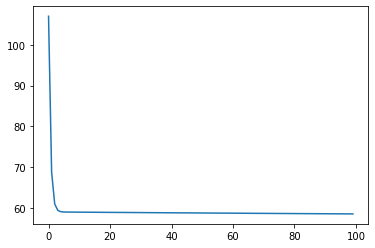

In [33]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [34]:
def predict(weights, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(n x d)
        n= number of training examples
        d= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)



In [35]:
predictions = predict(weights, X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [36]:
# Correct Predictions are the cases that are equal. 

correct = np.sum(predictions == y_test)


print("Accuracy is: ", correct/y_test.size)

Accuracy is:  0.47540983606557374


In [37]:
def compute_tp_tn_fn_fp(y_test, predictions):
    '''
    True positive - actual = 1, predicted = 1
    False positive - actual = 1, predicted = 0
    False negative - actual = 0, predicted = 1
    True negative - actual = 0, predicted = 0
    '''
    tp = sum((y_test == 1) & (predictions == 1))
    tn = sum((y_test == 0) & (predictions == 0))
    fn = sum((y_test == 1) & (predictions == 0))
    fp = sum((y_test == 0) & (predictions == 1))
    return tp, tn, fp, fn

In [38]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, predictions)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 1
TN for Logistic Reg : 28
FP for Logistic Reg : 1
FN for Logistic Reg : 31


In [39]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(y_test, predictions)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 1
TN for Random Forest : 28
FP for Random Forest : 1
FN for Random Forest : 31


In [40]:
def compute_precision(tp, fp):
    '''
    Precision = TP  / FP + TP 

    '''
    return (tp  * 100)/ float( tp + fp)

In [41]:
print('Precision for Logistic Regression :', compute_precision(tp_lr, fp_lr))
print('Precision for Random Forest :', compute_precision(tp_rf, fp_rf))

Precision for Logistic Regression : 50.0
Precision for Random Forest : 50.0


In [42]:
def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP 

    '''
    return (tp  * 100)/ float( tp + fn)

In [43]:
print('Recall for Logistic Regression :', compute_recall(tp_lr, fn_lr))
print('Recall for Random Forest :', compute_recall(tp_rf, fn_rf))

Recall for Logistic Regression : 3.125
Recall for Random Forest : 3.125


In [44]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [45]:
print('F1 score for Logistic Regression :', compute_f1_score(y_test, 
                                                             predictions))
print('F1 score for Random Forest :', compute_f1_score(y_test, 
                                                             predictions))

F1 score for Logistic Regression : 0.058823529411764705
F1 score for Random Forest : 0.058823529411764705


# Task 4 - Implement the Bold Driver   - (4 points)
In your GD implementation, add the bold driver idea to have a dynamic learning rate.

* Add a stop codition to stop the GD when the cost is not changing more than 0.001. (differences between two costs not more than 0.001, then stop)
* Can you stop earlier than 100 iterations? 




In [46]:
weights = np.zeros(n_feature)


cost = cost_function(X_train, y_train, weights)
grad = gradient(X_train, y_train, weights)

In [48]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001

cost_list = []
oldCost=0
precision = 0.001


# Implementation here is removed. 

# Your task to implement the GD here. 

for i in range(0, num_iterations):
    
    # 
    # Calculate the costs 
    cost = cost_function(X_train, y_train, weights)
    
    print('iter: ' , i, "Cost is: ", cost)
    # keep the costs for our visualization later 
    
    cost_list.append(cost)
    
    # Calculate the gradients [CODE REMOVED]
    grad = gradient(X_train, y_train, weights)
    grad = grad.astype('float64')
    
    # Use the gradient to update the weights [CODE REMOVED] 
    #print(grad)
    weights -= grad * learnin_rate
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost

iter:  0 Cost is:  0.6892692145377417
iter:  1 Cost is:  0.6891346512728146
Stoped at iteration 1


# Task 5 - Implement the L2 norm regularization.  - (4 points)

Modify your Cost and gradient to implement the l2 norm regularization. 
Repreat the task 1 and 2 to check if your result is changing. 

* Use y-itercept. 
* Do max 100 iterations as before and report your accuracy, Precision, Recall and F1. 
* You can stop earlier when the cost is not changing than 0.001. 


**Optional:** you might want to use the bold driver. But you can do this task without the bold driver as well. 



In [157]:
def costFunctionReg(X,y,theta,lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return(J)

def gradient_descent_reg(X,y,theta,alpha = 0.0005,lamda = 10,num_iters=100):
    '''Gradient descent for ridge regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #Used for three D plot

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Grad function in vectorized form
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda * theta )
           
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,lamda)
           
        #Calculate the cost for each iteration(used to plot convergence)
        #theta_0_hist.append(theta[0])
        #theta_1_hist.append(theta[1])   
    return theta, J_history
         
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Closed form solution for ridge regression'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)

def cost_l2(x,y):
    return x**2 + y**2 

In [144]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001
cost_list = []
oldCost=0

#weights = np.zeros(n_feature)
T1, T2 = np.meshgrid(np.linspace(-3,3,30),np.linspace(-3,3,30))
# Implementation here is removed. 

# Your task to implement the GD here. 
grad = gradient_descent_reg(X, y, weights,0.0001,3,num_iters=100)

#for i in range(0, num_iterations):
    
    # 
    # Calculate the costs 
    #cost = costFunctionReg(X_train, y_train,weights)
    
#print('iter: ' , i, "Cost is: ", grad)
    # keep the costs for our visualization later 
    
    #cost_list.append(cost)
    
    # Calculate the gradients [CODE REMOVED]
    #grad = gradient_descent_reg(X_train, y_train, weights.reshape(3),num_iters=100)
    #grad = grad.astype('float64')
    
    # Use the gradient to update the weights [CODE REMOVED] 
print(grad)
    #weights -= grad * learnin_rate
    

(array([nan, nan, nan], dtype=object), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan]))


In [158]:
print(closed_form_reg_solution(X,y,lamda = 3))

[0.005598430989638045 0.25621148806547056 -3.3121290991719575e-05]
